In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Reshape
from keras.models import Model
%matplotlib inline

In [2]:
def create_and_train_autoencoder(input_data, horizon, time_steps, epochs=100, batch_size=32):
    input_layer = Input(shape=(time_steps,))  # A entrada agora tem a forma de uma sequência temporal
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(time_steps, activation='linear')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    history = autoencoder.fit(input_data, input_data, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.3)

    encoded_data = autoencoder.predict(input_data)

    return history, encoded_data, autoencoder

In [3]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

In [4]:
ecg_df = pd.DataFrame({"ECG_100": ecg100})

In [5]:
horizon = 10  # Ajuste o valor conforme necessário
time_steps = 5  # Ajuste o valor conforme necessário

In [6]:
ecg_data = np.array([ecg100[i:i+horizon] for i in range(0, len(ecg100)-horizon+1, time_steps)])

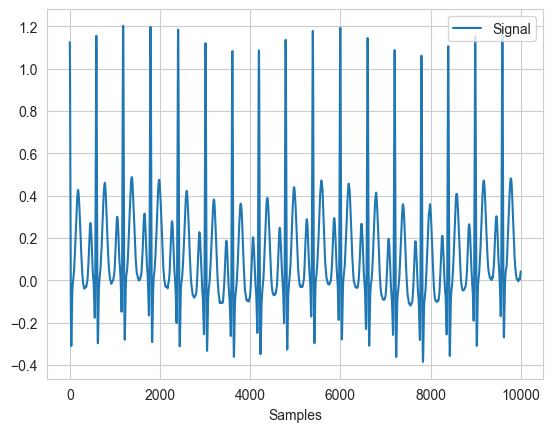

In [7]:
nk.signal_plot(ecg100)

In [8]:
history, encoded_ecg, autoencoder = create_and_train_autoencoder(ecg_data, horizon, time_steps)

Epoch 1/100


ValueError: in user code:

    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/palhares/opt/anaconda3/envs/ecg-embeddings/lib/python3.9/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 10)
